# Superlattice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

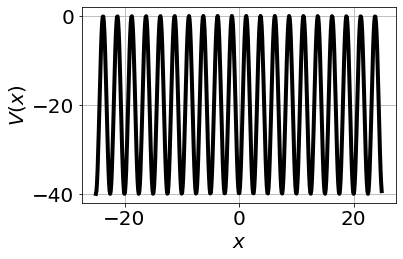

In [9]:
L = 50
N = 501
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1]-x[0]

V0 = 20
nw = 20
q = (2*np.pi/50)*nw
V = -V0*(np.cos(q*x) + 1)

plt.plot(x, V, lw=4, c='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.grid()
plt.tight_layout()
plt.show()

## Build the kinetic operator as a tridiagonal matrix

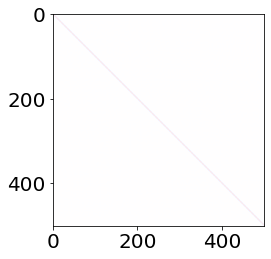

In [3]:
T = -0.5*(np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=+1))/dx**2

# add periodic boundary conditions
T[0,-1] = T[-1,0] = -0.5/dx**2

tmax = np.max(np.abs(T))

plt.imshow(T, vmin=-tmax, vmax=+tmax, cmap='bwr')
plt.tight_layout()
plt.show()

## Solve the eigenproblem and plot the results

In [4]:
H = T + np.diag(V)

en, psi = np.linalg.eigh(H)
print('First energies:', list(np.round(en[:5],1)))

First energies: [-34.6, -34.6, -34.6, -34.6, -34.6]


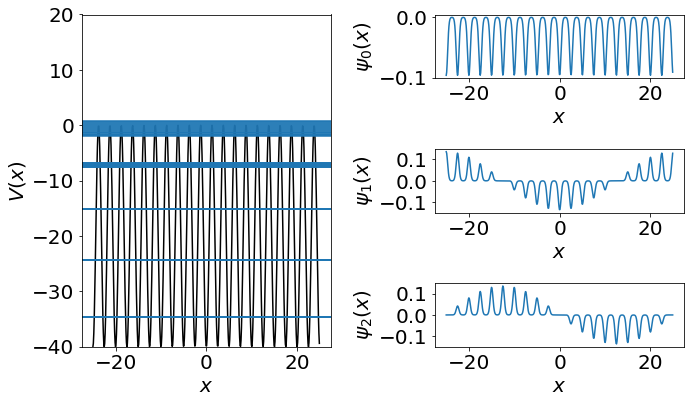

In [15]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.plot(x, V, c='black')
for n in range(100):
    plt.axhline(en[n], c='C0')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.ylim(-2*V0, V0)

for n in range(3): # 322 324 326
    plt.subplot(322 + 2*n)
    plt.plot(x, psi[:, n + nw*0])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\psi_'+str(n)+'(x)$')

plt.tight_layout()
plt.show()